<a href="https://colab.research.google.com/github/imrealhelper/TinyMPC/blob/main/Mpc_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tinympc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


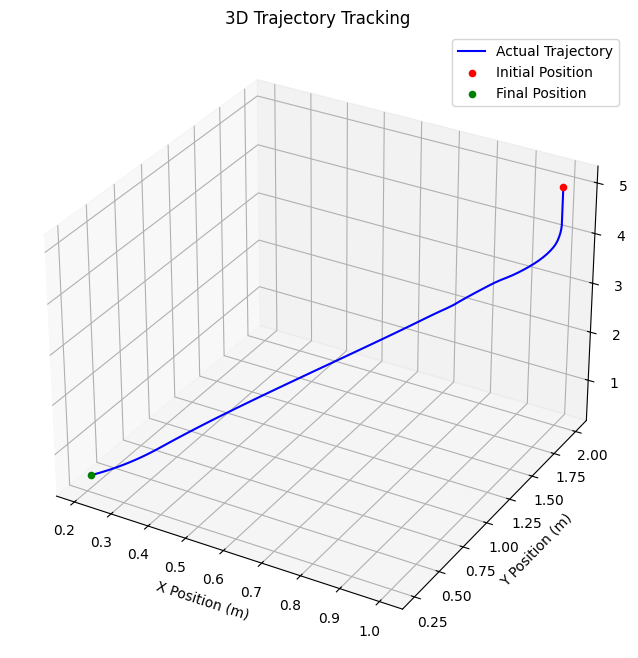

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tinympc import TinyMPC
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from tinympc import TinyMPC

# 상수 정의
NSTATES = 12  # 상태 변수 개수
NINPUTS = 4   # 입력 변수 개수
NHORIZON = 10  # 예측 지평선 길이
rho_value = 5.0  # ADMM 페널티 파라미터





# 상태 및 입력 데이터 (C++에서 제공된 데이터를 Python 배열로 변환)
Adyn_data = [
    1.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0009810, 0.0000000, 0.0100000, 0.0000000, 0.0000000, 0.0000000, 0.0000016, 0.0000000,
    0.0000000, 1.0000000, 0.0000000, -0.0009810, 0.0000000, 0.0000000, 0.0000000, 0.0100000, 0.0000000, -0.0000016, 0.0000000, 0.0000000,
    0.0000000, 0.0000000, 1.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0100000, 0.0000000, 0.0000000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0050000, 0.0000000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0050000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0050000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1962000, 0.0000000, 1.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0004905, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, -0.1962000, 0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000, -0.0004905, 0.0000000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000, 0.0000000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0000000, 0.0000000,
    0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 1.0000000
]
Adyn = np.array(Adyn_data).reshape(NSTATES, NSTATES)

Bdyn_data = [
    -0.0007069, 0.0007773, 0.0007091, -0.0007795,
    0.0007034, 0.0007747, -0.0007042, -0.0007739,
    0.0052554, 0.0052554, 0.0052554, 0.0052554,
    -0.1720966, -0.1895213, 0.1722891, 0.1893288,
    -0.1729419, 0.1901740, 0.1734809, -0.1907131,
    0.0123423, -0.0045148, -0.0174024, 0.0095748,
    -0.0565520, 0.0621869, 0.0567283, -0.0623632,
    0.0562756, 0.0619735, -0.0563386, -0.0619105,
    0.2102143, 0.2102143, 0.2102143, 0.2102143,
    -13.7677303, -15.1617018, 13.7831318, 15.1463003,
    -13.8353509, 15.2139209, 13.8784751, -15.2570451,
    0.9873856, -0.3611820, -1.3921880, 0.7659845
]
Bdyn = np.array(Bdyn_data).reshape(NSTATES, NINPUTS)



Q_data = np.array([100.0000000, 100.0000000, 500.0000000, 4.0000000, 4.0000000, 400.0000000, 4.0000000, 4.0000000, 4.0000000, 2.0408163, 2.0408163, 4.0000000])
Q = np.diag(Q_data)

R_data = [4.0] * NINPUTS
R = np.diag(R_data)

x_min = np.full((NSTATES, NHORIZON), -5)
x_min[2, :] = 0
x_max = np.full((NSTATES, NHORIZON), 5)
u_min = np.full((NINPUTS, NHORIZON-1), -0.5)
u_max = np.full((NINPUTS, NHORIZON-1), 0.5)


# 상태 및 입력 데이터
# 상태 제약 조건
x_min = np.full((NSTATES, NHORIZON), -5)
x_min[2, :] = 0  # z >= 0
x_max = np.full((NSTATES, NHORIZON), 5)

u_min = np.full((NINPUTS, NHORIZON-1), -0.5)
u_max = np.full((NINPUTS, NHORIZON-1), 0.5)

# 초기 상태
x0 = np.zeros([12])
x_init = np.array([1,2,5])
x0[:len(x_init)]  =x_init

# MPC 설정
mpc = TinyMPC()
mpc.setup(A=Adyn, B=Bdyn, Q=Q, R=R, N=NHORIZON, rho=rho_value,
          x_min=x_min, x_max=x_max, u_min=u_min, u_max=u_max, max_iter=10)

mpc.set_x0(x0)

tracking_errors = []
states_history = []
x_des = np.zeros_like(x0)
x_des[2] = 0.3





# 시뮬레이션 루프
for k in range(100):
    # 참조 궤적 업데이트
    mpc.set_x_ref(x_des)
    # 현재 상태 업데이트
    mpc.set_x0(x0)
    # MPC 솔버 실행
    solution = mpc.solve()
    u_opt = solution['controls']
    states_history.append(x0)
    x0 = Adyn @ x0 + Bdyn @ u_opt  # 시스템 업데이트

states_history = np.array(states_history).T

# 결과 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 실제 궤적
ax.plot(states_history[0, :], states_history[1, :], states_history[2, :],
        label="Actual Trajectory", color="blue")


# 초기 및 최종 위치
ax.scatter(states_history[0, 0], states_history[1, 0], states_history[2, 0],
           label="Initial Position", color="red")
ax.scatter(states_history[0, -1], states_history[1, -1], states_history[2, -1],
           label="Final Position", color="green")

# 축 레이블 및 범례
ax.set_title("3D Trajectory Tracking")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")
ax.legend()
plt.show()


In [ ]:
# Kalman Filter 초기화
P = np.eye(NSTATES)  # 초기 공분산 행렬
Q_kf = np.eye(NSTATES) * 0.01  # 시스템 노이즈 공분산
R_kf = np.eye(NSTATES) * 0.1   # 측정 노이즈 공분산
H = np.eye(NSTATES)            # 관측 행렬 (측정값이 상태값과 동일하다고 가정)

# 상태 초기화
x_kf = x0.copy()  # 칼만 필터의 초기 상태
states_history = []
# 시뮬레이션 루프

n_m = 100
for i in range(n_m):
  states_history = []
  for k in range(100):
      # Kalman Filter 예측 단계
      x_pred = Adyn @ x_kf  # 상태 예측
      P_pred = Adyn @ P @ Adyn.T + Q_kf  # 공분산 예측

      # 측정값 생성 (여기서는 실제 상태에 약간의 노이즈를 추가하여 측정값 시뮬레이션)
      measurement = x0 + np.random.multivariate_normal(np.zeros(NSTATES), R_kf)

      # Kalman Filter 갱신 단계
      y_tilde = measurement - H @ x_pred  # 측정 잔차
      S = H @ P_pred @ H.T + R_kf         # 잔차 공분산
      K = P_pred @ H.T @ np.linalg.inv(S)  # 칼만 이득
      x_kf = x_pred + K @ y_tilde         # 상태 업데이트
      P = (np.eye(NSTATES) - K @ H) @ P_pred  # 공분산 업데이트

      # MPC 업데이트
      mpc.set_x_ref(x_des)
      mpc.set_x0(x_kf)  # Kalman Filter로 추정된 상태를 MPC에 전달
      solution = mpc.solve()
      u_opt = solution['controls']

      # 시스템 업데이트
      x0 = Adyn @ x0 + Bdyn @ u_opt  # 실제 시스템의 상태 업데이트
      states_history.append(x0)

  states_history = np.array(states_history).T

  # 결과 시각화
  fig = plt.figure(figsize=(10, 8))

  # 실제 궤적
  ax.plot(states_history[0, :], states_history[1, :], states_history[2, :],
          label="Actual Trajectory")

  # 축 레이블 및 범례
  ax.set_title("3D Trajectory Tracking with Kalman Filter")
  ax.set_xlabel("X Position (m)")
  ax.set_ylabel("Y Position (m)")
  ax.set_zlabel("Z Position (m)")
  ax.legend()



plt.show()


<ipython-input-21-a479b8f71b1b>:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

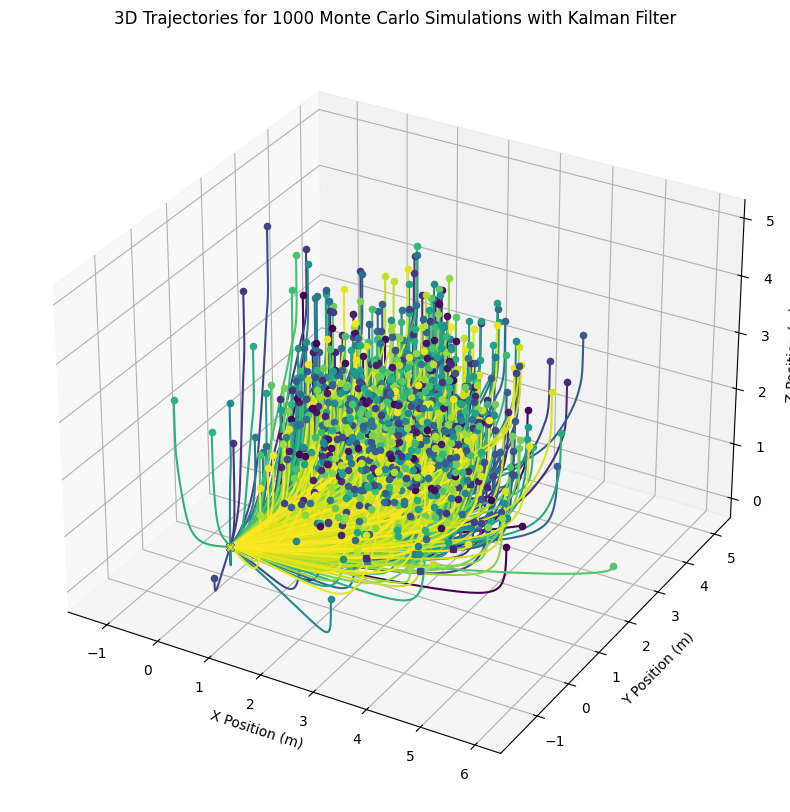

In [ ]:
from matplotlib.cm import get_cmap

n_mc = 50  # Monte Carlo 반복 횟수
all_states_history = []  # 모든 반복에서의 궤적 저장
x_des = np.zeros_like(x0)
x_des[2] = 0.2
colors = cmap(np.linspace(0, 1, n_mc))
# Monte Carlo 시뮬레이션 루프
for mc_iter in range(n_mc):
    # 상태 초기화
    x0 = np.zeros([12])
    x_init = np.random.randn(3) + 2
    if x_init[2] <0:
      x_init[2] +=3

    #print(x_init)
    x0[:len(x_init)]  =x_init

    states_history = []

    # 시뮬레이션 루프
    for k in range(300):
        # 참조 궤적 업데이트
        mpc.set_x_ref(x_des)
        # 현재 상태 업데이트
        mpc.set_x0(x0)
        # MPC 솔버 실행
        solution = mpc.solve()
        u_opt = solution['controls']
        states_history.append(x0)
        x0 = Adyn @ x0 + Bdyn @ u_opt  # 시스템 업데이트
        if x0[2] < 0.1:
          break

    all_states_history.append(np.array(states_history).T)  # 각 반복의 궤적 저장

# 결과 시각화
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 모든 Monte Carlo 궤적 플롯
for idx, states_history in enumerate(all_states_history):
    ax.plot(states_history[0, :], states_history[1, :], states_history[2, :],
            color=colors[idx], label=f"Trajectory {idx + 1}" if idx < 10 else None)

# 초기 및 최종 위치
for idx, states_history in enumerate(all_states_history):
    ax.scatter(states_history[0, 0], states_history[1, 0], states_history[2, 0],
               c=[colors[idx]], marker="o")  # 수정된 부분
    ax.scatter(states_history[0, -1], states_history[1, -1], states_history[2, -1],
               c=[colors[idx]], marker="x")  # 수정된 부분

# 축 레이블 및 범례
ax.set_title(f"3D Trajectories for {n_mc} Monte Carlo Simulations with Kalman Filter")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")

# 범례는 너무 많으면 첫 10개만 표시
if n_mc <= 10:
    ax.legend()

plt.show()


<ipython-input-113-b1a656729532>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('inferno')


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

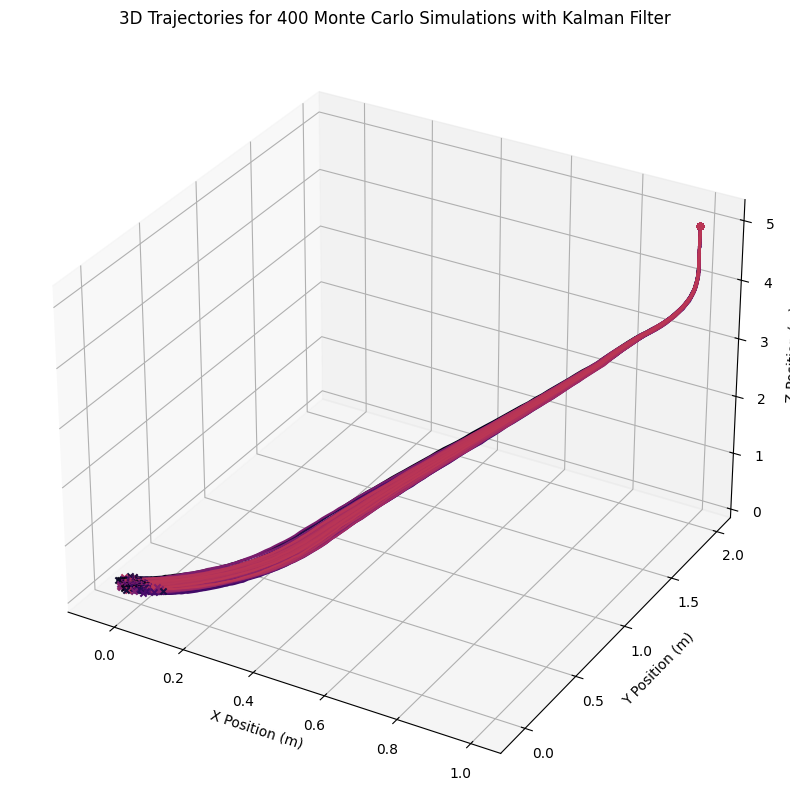

In [ ]:
from matplotlib.cm import get_cmap
import numpy as np
import matplotlib.pyplot as plt

n_mc = 400  # Monte Carlo 반복 횟수
all_states_history = []  # 모든 반복에서의 궤적 저장

# 참조 상태 설정
x_des = np.zeros(12)
x_des[2] = 0.2

# 컬러맵 설정
cmap = get_cmap('inferno')
colors = cmap(np.linspace(0, 1, n_mc))

# 시스템 행렬 정의
A = Adyn  # 시스템 동적 행렬
B = Bdyn  # 입력 행렬

# 측정 행렬 (위치만 측정한다고 가정)
C = np.zeros((3, 12))
C[0, 0] = 1  # X 위치 측정
C[1, 1] = 1  # Y 위치 측정
C[2, 2] = 1  # Z 위치 측정

# 프로세스 노이즈 공분산
Q = np.eye(12) * 0.01  # 작은 프로세스 노이즈

# 측정 노이즈 공분산
R = np.eye(3) * 0.01  # 측정 노이즈

# 초기 추정 오차 공분산
P = np.eye(12)
it = 0
at = 0
# Monte Carlo 시뮬레이션 루프
while it < 200 :
    # 상태 초기화
    x0 = np.zeros([12])
    x_init = np.array([1,2,5])


    x0[:len(x_init)] = x_init

    # 실제 상태 및 추정 상태 초기화
    x_true = x0.copy()
    x_estimate = x0.copy()
    P_estimate = P.copy()

    states_history = []
    states_history.append(x_true)
    # 시뮬레이션 루프

    for k in range(200):
        # 참조 궤적 업데이트
        mpc.set_x_ref(x_des)
        # 추정된 현재 상태 업데이트
        mpc.set_x0(x_estimate)
        # MPC 솔버 실행
        solution = mpc.solve()
        u_opt = solution['controls']

        # 프로세스 노이즈를 포함한 실제 시스템 업데이트
        w_k = 0.01*np.random.multivariate_normal(np.zeros(12), Q)
        w_k[:3] = 0
        x_true = A @ x_true + B @ u_opt + w_k

        # 측정 노이즈를 포함한 측정값 생성
        v_k = 0.01*np.random.multivariate_normal(np.zeros(3), R)
        y = C @ x_true + v_k

        # 칼만 필터 예측 단계
        x_pred = A @ x_estimate + B @ u_opt
        P_pred = A @ P_estimate @ A.T + Q

        # 칼만 필터 업데이트 단계
        y_pred = C @ x_pred
        S = C @ P_pred @ C.T + R
        K = P_pred @ C.T @ np.linalg.inv(S)
        x_estimate = x_pred + K @ (y - y_pred)
        P_estimate = (np.eye(len(x_estimate)) - K @ C) @ P_pred

        # 추정된 상태 저장
        states_history.append(x_estimate.copy())

        # 종료 조건 체크
        if x_true[2] < 0:
            break
    it +=1
    print(it,end = ' ')
    all_states_history.append(np.array(states_history).T)  # 각 반복의 궤적 저장
'''    if np.linalg.norm(np.array(states_history)[-1,:2] - x_des[:2]) < 0.1:
      print(it,end = ' ')
      it +=1
      all_states_history.append(np.array(states_history).T)  # 각 반복의 궤적 저장'''


# 결과 시각화
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 모든 Monte Carlo 궤적 플롯
for idx, states_history in enumerate(all_states_history):
    ax.plot(states_history[0, :], states_history[1, :], states_history[2, :],
            color=colors[idx], label=f"Trajectory {idx + 1}" if idx < 10 else None)

# 초기 및 최종 위치
for idx, states_history in enumerate(all_states_history):
    ax.scatter(states_history[0, 0], states_history[1, 0], states_history[2, 0],
               c=[colors[idx]], marker="o")  # 시작점
    ax.scatter(states_history[0, -1], states_history[1, -1], states_history[2, -1],
               c=[colors[idx]], marker="x")  # 종료점

# 축 레이블 및 범례
ax.set_title(f"3D Trajectories for {n_mc} Monte Carlo Simulations with Kalman Filter")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")

# 범례는 너무 많으면 첫 10개만 표시
if n_mc <= 10:
    ax.legend()

plt.show()


In [ ]:
states_history

array([[ 1.00000000e+00,  1.00059415e+00,  9.99652544e-01, ...,
         9.75505642e-03,  8.58835282e-03,  7.63814062e-03],
       [ 2.00000000e+00,  2.00073387e+00,  1.99928865e+00, ...,
         1.09504201e-02,  1.06699747e-02,  1.03449218e-02],
       [ 5.00000000e+00,  4.99024215e+00,  4.97516866e+00, ...,
         1.99069386e-01,  1.99909051e-01,  2.00178524e-01],
       ...,
       [ 0.00000000e+00, -1.16244419e-09,  8.25088951e-07, ...,
         5.92887298e-02,  4.87336607e-02,  2.97531432e-02],
       [ 0.00000000e+00,  9.41133378e-10, -5.37396582e-07, ...,
         1.45981089e-02,  4.27243496e-03,  3.23522229e-02],
       [ 0.00000000e+00, -5.00000000e-08, -9.99999999e-08, ...,
        -2.04674318e-03, -8.71598997e-04, -1.52702389e-03]])

In [ ]:
all_states_history

[array([[ 1.00000000e+00,  9.99881799e-01,  1.00063462e+00, ...,
         -3.45174854e-02, -3.51066826e-02, -3.60683179e-02],
        [ 2.00000000e+00,  2.00123136e+00,  1.99990383e+00, ...,
         -2.66639710e-02, -2.75097663e-02, -2.65754801e-02],
        [ 5.00000000e+00,  4.98968691e+00,  4.97539353e+00, ...,
          1.99756883e-01,  2.00922224e-01,  2.01685536e-01],
        ...,
        [ 0.00000000e+00, -1.95047172e-09,  7.57049657e-07, ...,
          5.02167189e-02,  7.98427054e-02,  4.29507135e-02],
        [ 0.00000000e+00, -1.87229665e-10,  4.30199446e-07, ...,
         -1.51977920e-02, -6.34713015e-02, -4.52833433e-02],
        [ 0.00000000e+00, -5.00000000e-08, -9.99999999e-08, ...,
          1.24127177e-03,  2.32261926e-03,  1.36940352e-03]]),
 array([[ 1.00000000e+00,  9.99702775e-01,  9.99409243e-01, ...,
         -1.30495969e-02, -1.19969590e-02, -1.15258805e-02],
        [ 2.00000000e+00,  1.99998808e+00,  2.00040659e+00, ...,
         -2.98329032e-02, -3.08264546e

0.02907566824411633


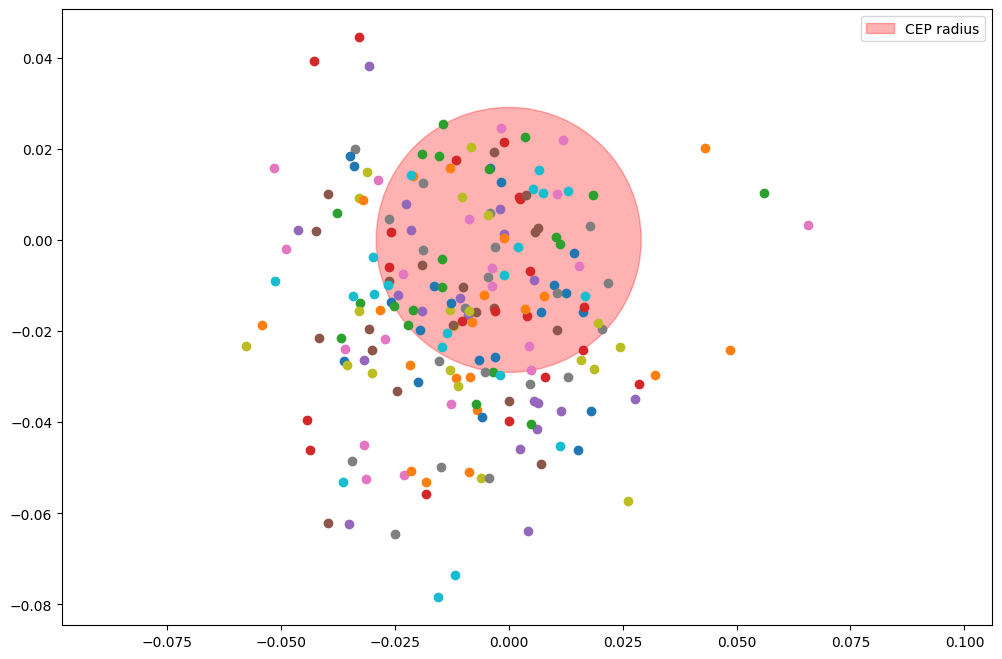

In [ ]:
plt.figure(figsize = [12,8])
n_mc = len(all_states_history)
impact_points = np.zeros((n_mc,2))
CEPS = np.zeros(n_mc)

for idx, states_history in enumerate(all_states_history):
    impact_point = states_history[:2, -1]
    impact_points[idx] = impact_point
    CEPS[idx] = np.linalg.norm(impact_point - np.array([0,0]))
CEPS = sorted(CEPS)
r_cep = CEPS[len(CEPS)//2]



print(r_cep)
for idx, states_history in enumerate(all_states_history):
    if states_history[0,-1] < 3 and states_history[1,-1] < 3:
      plt.plot(states_history[0, -1], states_history[1, -1],"o")

circle = plt.Circle(np.array([0,0]), r_cep, color='r', alpha=0.3, fill=True, label="CEP radius")
plt.gca().add_artist(circle)
plt.axis('equal')
plt.legend()
plt.show()